# Week 9: Extracting Meaning from Audio - Histograms <font size="1">Rev.: 20181121b</font>

Instructions: Run this code by opening a python command prompt and type "jupyter notebook" and navigate to the folder containing the ipynb file and open it. If you prefer running Python outside the notebook environment, you can extract the code from within Jupyter using File->Download as -> Python

This notebook provides a few hints about plotting histograms of nummerical features extracted in SonicVisualizer. The script/plots can be improved in several ways.

References:

[1] https://en.wikipedia.org/wiki/Histogram

[2] https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.histogram.html


## Step 1: Let's load the Python libraries we need

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

## Step 2: Let's load the data from SonicVisualizer 

In [71]:
fn1 = "data/larghetto/l_mfcc.csv"
fn2 = "data/andante/a_mfcc.csv"
fn3 = "data/allegro_Mod/am_mfcc.csv"

my_data1 = genfromtxt(fn1, delimiter=',')
my_data2 = genfromtxt(fn2, delimiter=',')
my_data3 = genfromtxt(fn2, delimiter=',')



Did it load without errors? If so, great (if not check the filename etc).

## Step 3: Let's inspect the data

In [72]:
my_data1

array([[-3.01504e+01,  1.81545e+00,  6.41107e-01, ...,  7.86712e-03,
         8.01991e-02,  9.16975e-02],
       [-2.97097e+01,  1.21598e+00,  9.56005e-01, ..., -1.89884e-01,
         3.96670e-02,  1.89182e-01],
       [-2.97312e+01,  1.56739e+00,  5.57037e-01, ..., -3.17171e-02,
         7.20194e-02,  2.78567e-01],
       ...,
       [-2.56711e+01,  4.24883e+00,  1.64749e+00, ...,  1.83631e-01,
         1.81788e-01, -7.37958e-02],
       [-2.53840e+01,  4.08605e+00,  1.60355e+00, ...,  2.10669e-01,
         5.58013e-02,  1.67322e-02],
       [-2.73152e+01,  4.83887e+00,  1.30017e+00, ...,  1.66154e-01,
         5.79400e-02,  6.02930e-02]])

In [73]:
my_data2

array([[-2.76012e+01,  2.21893e+00,  5.87723e-01, ...,  1.25124e-01,
         1.25879e-01,  7.08815e-02],
       [-2.68571e+01,  2.46520e+00,  5.20714e-01, ...,  1.70238e-01,
         2.14968e-01,  2.69390e-01],
       [-2.68685e+01,  2.33818e+00,  6.67109e-01, ...,  2.40488e-01,
         1.54428e-01,  1.05819e-02],
       ...,
       [-2.57128e+01,  3.76709e+00,  8.30379e-01, ...,  1.62500e-01,
         2.93277e-01,  1.62708e-01],
       [-2.59733e+01,  3.75527e+00,  8.94303e-01, ...,  3.06241e-01,
         4.28560e-01,  2.26763e-01],
       [-2.68850e+01,  4.05710e+00,  6.48043e-01, ...,  3.54812e-01,
         3.71922e-01,  1.63335e-01]])

In [74]:
my_data3

array([[-2.76012e+01,  2.21893e+00,  5.87723e-01, ...,  1.25124e-01,
         1.25879e-01,  7.08815e-02],
       [-2.68571e+01,  2.46520e+00,  5.20714e-01, ...,  1.70238e-01,
         2.14968e-01,  2.69390e-01],
       [-2.68685e+01,  2.33818e+00,  6.67109e-01, ...,  2.40488e-01,
         1.54428e-01,  1.05819e-02],
       ...,
       [-2.57128e+01,  3.76709e+00,  8.30379e-01, ...,  1.62500e-01,
         2.93277e-01,  1.62708e-01],
       [-2.59733e+01,  3.75527e+00,  8.94303e-01, ...,  3.06241e-01,
         4.28560e-01,  2.26763e-01],
       [-2.68850e+01,  4.05710e+00,  6.48043e-01, ...,  3.54812e-01,
         3.71922e-01,  1.63335e-01]])

So this seems to be an array with some nummerical values; is this expected... well yes!
Let's check the number of rows and collums in the array....

In [75]:
my_data1.shape


(4889, 20)

In [76]:
my_data2.shape

(4744, 20)

In [77]:
my_data3.shape

(4744, 20)

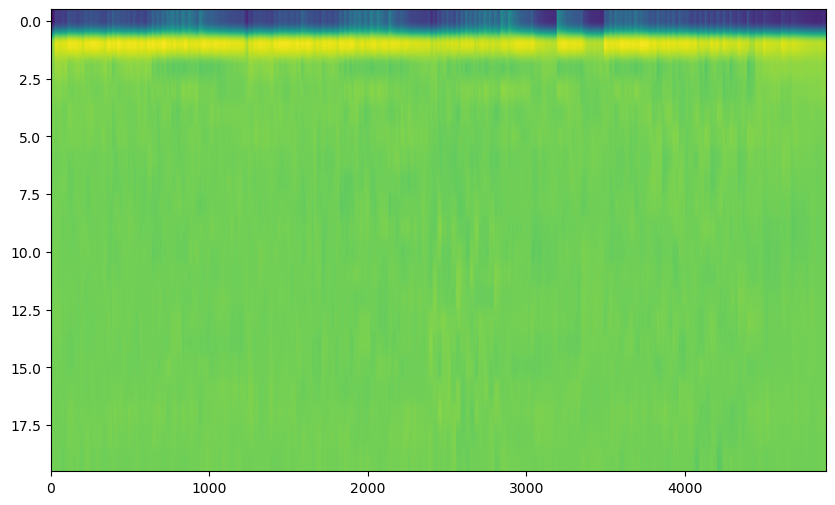

In [78]:
fig, axes = plt.subplots(1, 1,sharey='row',figsize=(10, 6))
axes.imshow(my_data1.T, aspect='auto')
plt.show()

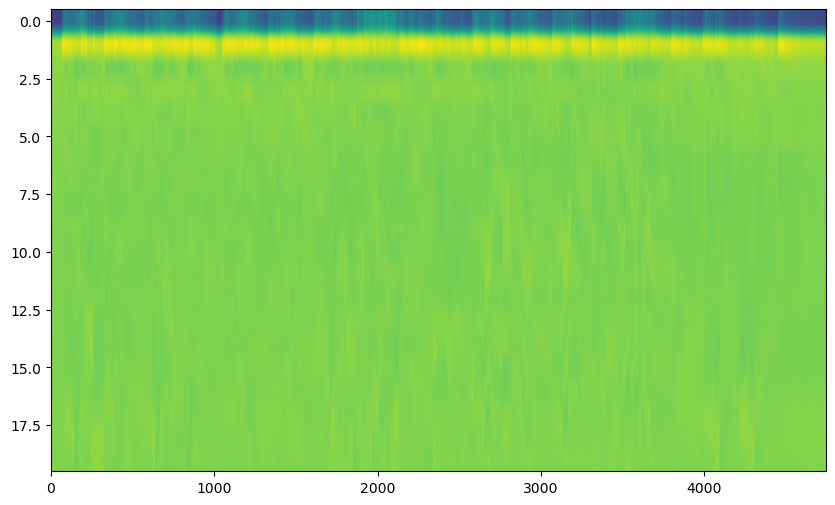

In [79]:
fig, axes = plt.subplots(1, 1,sharey='row',figsize=(10, 6))
axes.imshow(my_data2.T, aspect='auto')
plt.show()

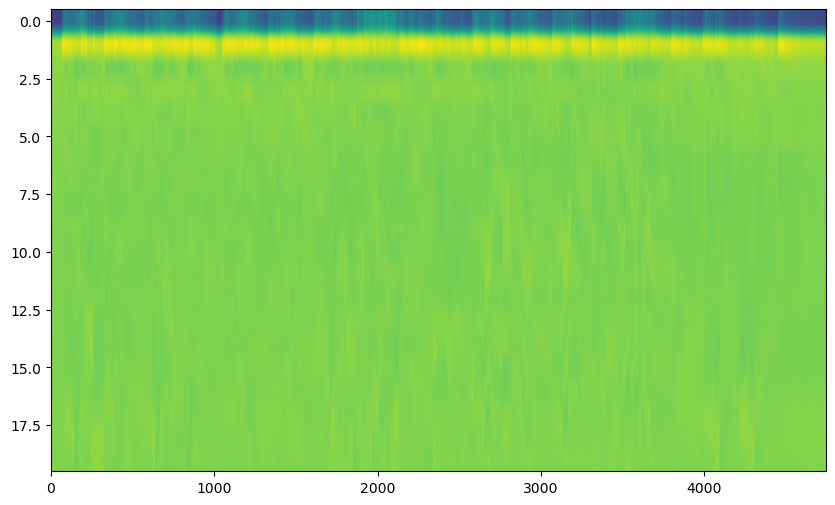

In [80]:
fig, axes = plt.subplots(1, 1,sharey='row',figsize=(10, 6))
axes.imshow(my_data3.T, aspect='auto')
plt.show()

# Step 4: A histogram for one feature

We can pick out one of the features for teh whole track (i.e. a collum) using the following code snippet

In [81]:
feature_index = 0 # for mfcc this can be between 0-19
my_data_single_features1 = my_data1[:,feature_index]
my_data_single_features2 = my_data2[:,feature_index]
my_data_single_features3 = my_data3[:,feature_index]

In [82]:
my_data_single_features1

array([-30.1504, -29.7097, -29.7312, ..., -25.6711, -25.384 , -27.3152])

In [83]:
my_data_single_features2

array([-27.6012, -26.8571, -26.8685, ..., -25.7128, -25.9733, -26.885 ])

In [84]:
my_data_single_features3

array([-27.6012, -26.8571, -26.8685, ..., -25.7128, -25.9733, -26.885 ])

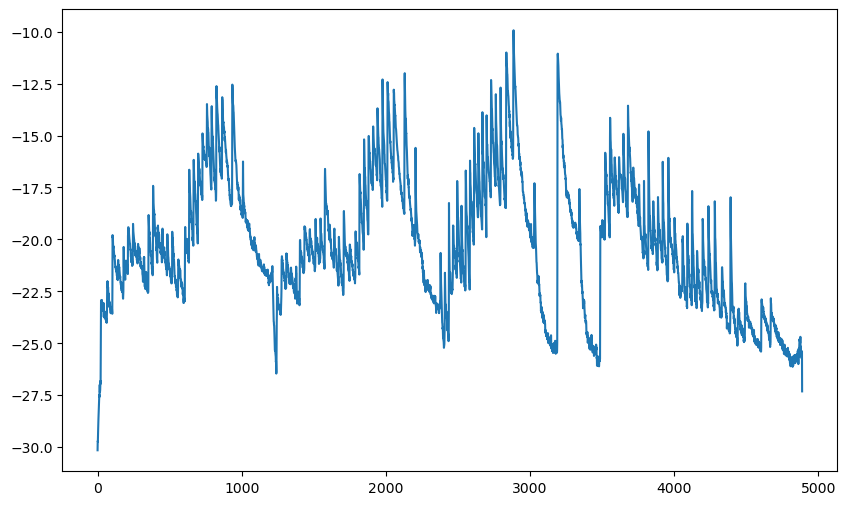

In [85]:
fig, axes = plt.subplots(1, 1,sharey='row',figsize=(10, 6))
axes.plot(my_data_single_features1)
plt.show()

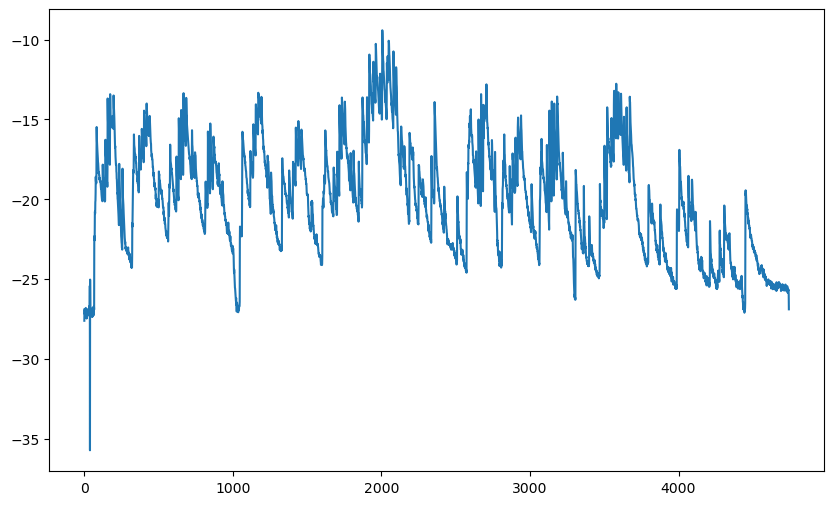

In [86]:
fig, axes = plt.subplots(1, 1,sharey='row',figsize=(10, 6))
axes.plot(my_data_single_features2)
plt.show()

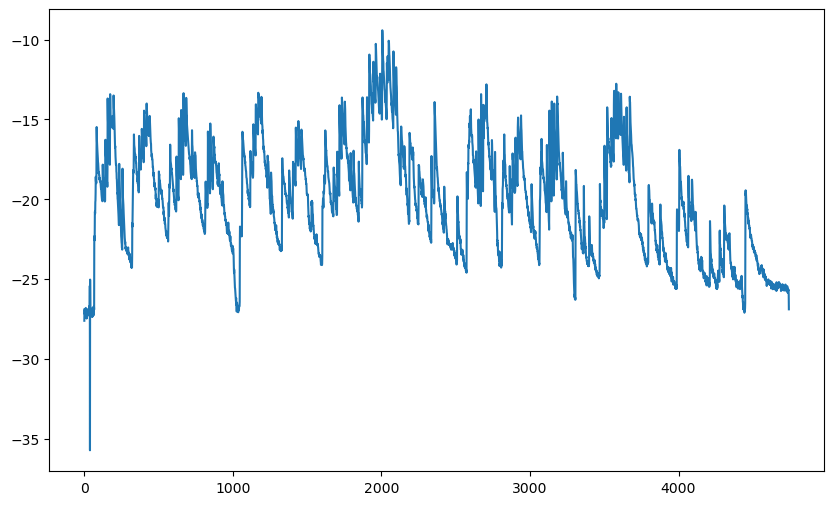

In [87]:
fig, axes = plt.subplots(1, 1,sharey='row',figsize=(10, 6))
axes.plot(my_data_single_features3)
plt.show()

In [88]:
my_data_single_features.shape

(4889,)

Ok, the data looks as expected; let's do the histogram

In [89]:
mm =np.mean(my_data_single_features)
print(mm)

-0.036517519030906116


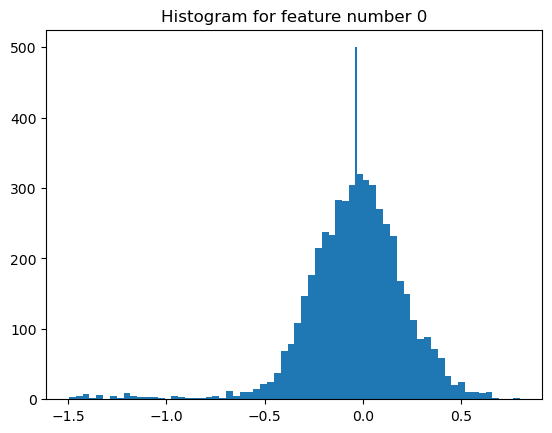

In [90]:
plt.hist(my_data_single_features, bins='auto')  
plt.vlines(mm,0,500)
plt.title("Histogram for feature number " + str(feature_index))
plt.show()

# Step 5: Histogram for all features

First, let's define a few vaues related to the plotting and layout of subfigures. You may need to change these slightly to get a decent layout on your screen

In [91]:
myleft  = 0.125  # the left side of the subplots of the figure
myright = 0.9    # the right side of the subplots of the figure
mybottom = 0.1   # the bottom of the subplots of the figure
mytop = 0.9      # the top of the subplots of the figure
mywspace = 0.2   # the amount of width reserved for space between subplots,
                 # expressed as a fraction of the average axis width
myhspace = 0.2   # the amount of height reserved for space between subplots,
                 # expressed as a fraction of the average axis height


Ok, let's iterate over the 20 features and plot in a 5 x 4 layout

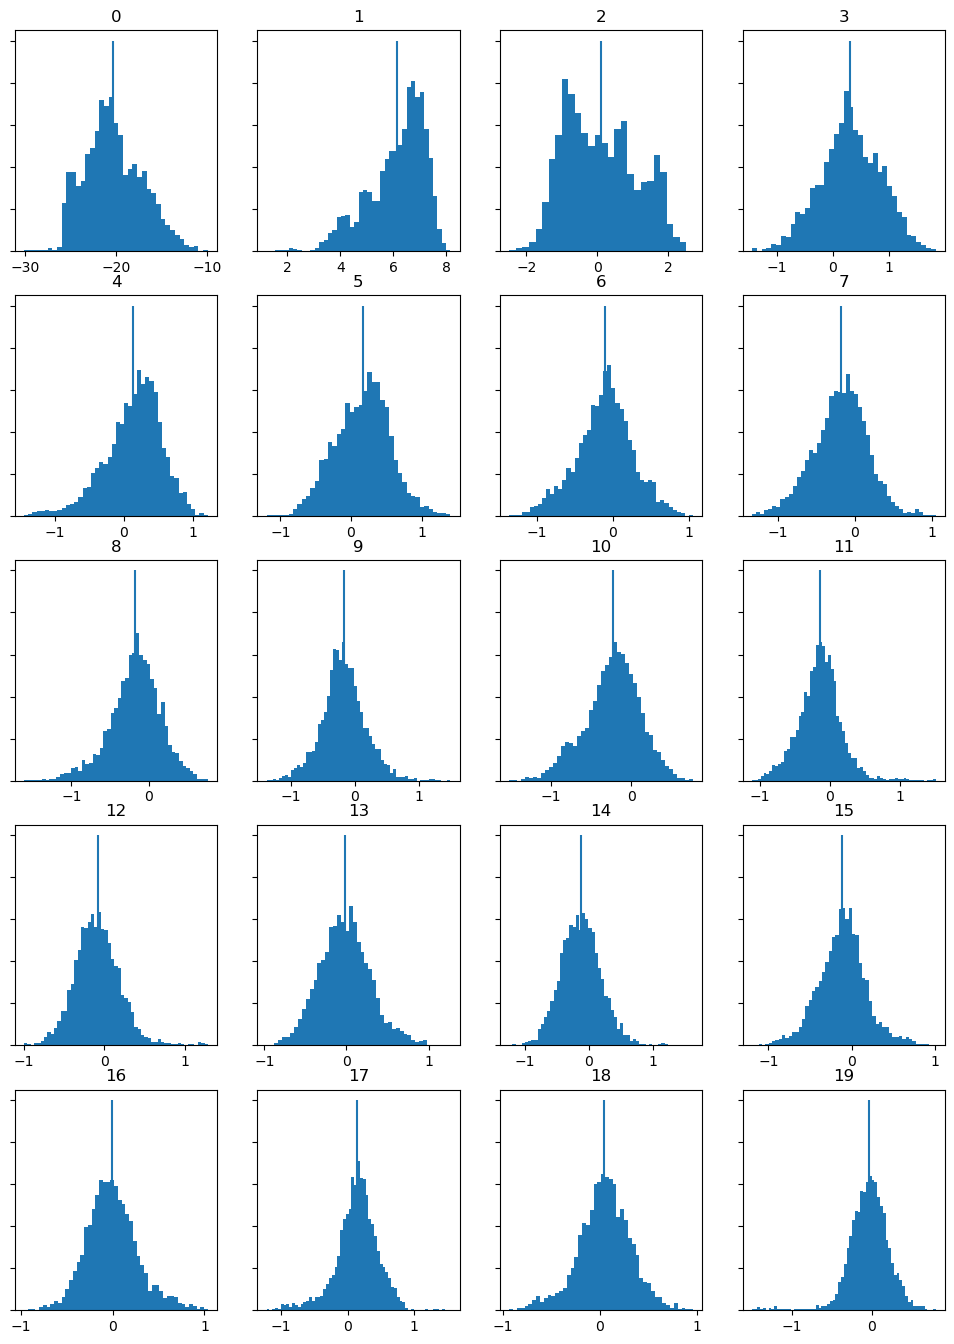

In [92]:
fig, axes = plt.subplots(5, 4,sharey='row',figsize=(12, 16))
for i in range(0,5): 
    for j in range(0,4): 
        feature_index = i*4+j # for mfccs, this can be between 0-19
        my_data_single_features = my_data[:,feature_index]
        mm =np.mean(my_data_single_features)
        axes[i,j].vlines(mm,0,500)
        axes[i,j].hist(my_data_single_features, bins='auto')  
        axes[i,j].set_title(str(feature_index))
        axes[i,j].yaxis.set_ticklabels([])  # let's not show the y axis
                
plt.subplots_adjust(myleft, mybottom, myright, mytop, mywspace, myhspace)
plt.show()

You can save the image using the following command

In [93]:
fig.savefig('my_analysis.png')

### Next...

How do you compare two or more histograms of individual features ? You can either do the comparison individually, i.e., plot seperate figures for each track, but it might be helpful to plot features from the three individaul tracks in the same subplot. Perhaps discuss this with the tutor.
